# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 7 submission</b></u>

### Roster Name: Nand Kishore Khuswaha
### Student ID: 013920192
### Email address: nandkishore.khuswaha@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

1) MLP.MNIST (class file)

2) Train_validation_test_Iris (class file)

3) Dimensionality_reduction (class file)

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [82]:
import numpy as np
from sklearn.datasets  import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
import seaborn as sns
import pandas as pd



In [83]:
np.random.seed(42)

#### Code the solution

In [84]:
mnist = load_digits()

In [85]:
n_samples = len(mnist.images)
images=mnist.images
images.shape
images_resh = images.reshape(images.shape[0],-1)
# images = mnist.images.reshape((n_samples, -1))
images_nor = images_resh.astype("float32")/255
labels = mnist.target


In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(images_nor, labels, test_size=0.2, random_state=0,stratify=labels)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

#### 1. A model with default parameters for MLPClassifier other than random_state=1 and max_iter=max_iter

In [87]:
model = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, Y_train)

In [88]:
model.score(X_test, Y_test)

0.9722222222222222

In [89]:
#  perform stratified 5-fold cross-validation
stratkfolds = StratifiedKFold(n_splits=5)
for train_indices, validation_indices in stratkfolds.split(X_train, Y_train):
    print("Training indices: "+str(train_indices))
    print("Validation indices: "+str(validation_indices))
    X_train_set, X_validation_set = X_train[train_indices], X_train[validation_indices]
    Y_train_set, Y_validation_set = Y_train[train_indices], Y_train[validation_indices]
    print("Shapes of train/valiation sets:")
    print(X_train_set.shape, Y_train_set.shape, X_validation_set.shape, Y_validation_set.shape)

Training indices: [ 194  195  208 ... 1434 1435 1436]
Validation indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 196 197 198 199
 200 201 202 203 204 205 206 207 209 211 213 214 215 216 219 221 222 223
 224 225 226 228 229 230 231 232 233 234 235 236 2

In [90]:
# collect prediction accuracies for each fold
cv_results_m1_train = cross_validate(model, X_train, Y_train, cv=5)
print(cv_results_m1_train['test_score'])
print("Mean accuracy: "+str(cv_results_m1_train['test_score'].mean()))

/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.96180556 0.98263889 0.95818815 0.96864111 0.96515679]
Mean accuracy: 0.9672861014324429


In [91]:
# In addition, compute prediction accuracies on the held-out test set.  
cv_results = cross_validate(model, X_test, Y_test, cv=5)
print(cv_results['test_score'])
print("Mean accuracy: "+str(cv_results['test_score'].mean()))

/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.94444444 0.90277778 0.94444444 0.94444444 0.90277778]
Mean accuracy: 0.9277777777777778


/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### 2.Three hidden layer sizes: 400,150,50; with Relu activation function 

In [92]:
model = MLPClassifier(hidden_layer_sizes=(400,150,50), activation = 'relu', max_iter=600, solver='adam',random_state=1).fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9472222222222222

In [93]:
#  perform stratified 5-fold cross-validation
stratkfolds = StratifiedKFold(n_splits=5)
for train_indices, validation_indices in stratkfolds.split(X_train, Y_train):
    print("Training indices: "+str(train_indices))
    print("Validation indices: "+str(validation_indices))
    X_train_set, X_validation_set = X_train[train_indices], X_train[validation_indices]
    Y_train_set, Y_validation_set = Y_train[train_indices], Y_train[validation_indices]
    print("Shapes of train/valiation sets:")
    print(X_train_set.shape, Y_train_set.shape, X_validation_set.shape, Y_validation_set.shape)

Training indices: [ 194  195  208 ... 1434 1435 1436]
Validation indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 196 197 198 199
 200 201 202 203 204 205 206 207 209 211 213 214 215 216 219 221 222 223
 224 225 226 228 229 230 231 232 233 234 235 236 2

In [94]:
# collect prediction accuracies for each fold
cv_results_m2_train = cross_validate(model, X_train, Y_train, cv=5)
print(cv_results_m2_train['test_score'])
print("Mean accuracy: "+str(cv_results_m2_train['test_score'].mean()))

[0.95486111 0.97569444 0.95121951 0.95818815 0.95121951]
Mean accuracy: 0.9582365466511806


In [95]:
# In addition, compute prediction accuracies on the held-out test set.  
cv_results = cross_validate(model, X_test, Y_test, cv=5)
print(cv_results['test_score'])
print("Mean accuracy: "+str(cv_results['test_score'].mean()))

[0.88888889 0.875      0.88888889 0.90277778 0.875     ]
Mean accuracy: 0.8861111111111111


#### 3. Three hidden layer sizes: 400,150,50; with logistic activation function 

In [98]:
model = MLPClassifier(hidden_layer_sizes=(400,150,50), activation = 'logistic', max_iter=500, solver='adam',random_state=1).fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8611111111111112

In [ ]:
#  perform stratified 5-fold cross-validation
stratkfolds = StratifiedKFold(n_splits=5)
for train_indices, validation_indices in stratkfolds.split(X_train, Y_train):
    print("Training indices: "+str(train_indices))
    print("Validation indices: "+str(validation_indices))
    X_train_set, X_validation_set = X_train[train_indices], X_train[validation_indices]
    Y_train_set, Y_validation_set = Y_train[train_indices], Y_train[validation_indices]
    print("Shapes of train/valiation sets:")
    print(X_train_set.shape, Y_train_set.shape, X_validation_set.shape, Y_validation_set.shape)

In [99]:
# collect prediction accuracies for each fold
cv_results_m3_train = cross_validate(model, X_train, Y_train, cv=5)
print(cv_results_m3_train['test_score'])
print("Mean accuracy: "+str(cv_results_m3_train['test_score'].mean()))

/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.88541667 0.88541667 0.85714286 0.89198606 0.89547038]
Mean accuracy: 0.8830865272938443


In [100]:
# In addition, compute prediction accuracies on the held-out test set.  
cv_results = cross_validate(model, X_test, Y_test, cv=5)
print(cv_results['test_score'])
print("Mean accuracy: "+str(cv_results['test_score'].mean()))

[0.09722222 0.09722222 0.09722222 0.09722222 0.09722222]
Mean accuracy: 0.09722222222222222


#### 4. Three hidden layer sizes: 64,32,8; with Relu activation function 

In [108]:
model = MLPClassifier(hidden_layer_sizes=(64,32,8),activation = 'relu', max_iter=1100, solver='adam',random_state=1).fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9333333333333333

In [109]:
#  perform stratified 5-fold cross-validation
stratkfolds = StratifiedKFold(n_splits=5)
for train_indices, validation_indices in stratkfolds.split(X_train, Y_train):
    print("Training indices: "+str(train_indices))
    print("Validation indices: "+str(validation_indices))
    X_train_set, X_validation_set = X_train[train_indices], X_train[validation_indices]
    Y_train_set, Y_validation_set = Y_train[train_indices], Y_train[validation_indices]
    print("Shapes of train/valiation sets:")
    print(X_train_set.shape, Y_train_set.shape, X_validation_set.shape, Y_validation_set.shape)

Training indices: [ 194  195  208 ... 1434 1435 1436]
Validation indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 196 197 198 199
 200 201 202 203 204 205 206 207 209 211 213 214 215 216 219 221 222 223
 224 225 226 228 229 230 231 232 233 234 235 236 2

In [110]:
# collect prediction accuracies for each fold
cv_results_m4_train = cross_validate(model, X_train, Y_train, cv=5)
print(cv_results_m4_train['test_score'])
print("Mean accuracy: "+str(cv_results_m4_train['test_score'].mean()))

/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.93402778 0.95138889 0.93031359 0.93031359 0.93031359]
Mean accuracy: 0.935271486643438


/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [111]:
# In addition, compute prediction accuracies on the held-out test set.  
cv_results = cross_validate(model, X_test, Y_test, cv=5)
print(cv_results['test_score'])
print("Mean accuracy: "+str(cv_results['test_score'].mean()))

/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.83333333 0.81944444 0.81944444 0.91666667 0.84722222]
Mean accuracy: 0.8472222222222221


/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### 5. Two hidden layer sizes: 32,16; with Relu activation function 

In [112]:
model = MLPClassifier(hidden_layer_sizes=(32,16),activation = 'relu', max_iter=1600, solver='adam',random_state=1).fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9277777777777778

In [113]:
#  perform stratified 5-fold cross-validation
stratkfolds = StratifiedKFold(n_splits=5)
for train_indices, validation_indices in stratkfolds.split(X_train, Y_train):
    print("Training indices: "+str(train_indices))
    print("Validation indices: "+str(validation_indices))
    X_train_set, X_validation_set = X_train[train_indices], X_train[validation_indices]
    Y_train_set, Y_validation_set = Y_train[train_indices], Y_train[validation_indices]
    print("Shapes of train/valiation sets:")
    print(X_train_set.shape, Y_train_set.shape, X_validation_set.shape, Y_validation_set.shape)

Training indices: [ 194  195  208 ... 1434 1435 1436]
Validation indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 196 197 198 199
 200 201 202 203 204 205 206 207 209 211 213 214 215 216 219 221 222 223
 224 225 226 228 229 230 231 232 233 234 235 236 2

In [114]:
# collect prediction accuracies for each fold
cv_results_m5_train = cross_validate(model, X_train, Y_train, cv=5)
print(cv_results_m5_train['test_score'])
print("Mean accuracy: "+str(cv_results_m5_train['test_score'].mean()))

/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.9375     0.95486111 0.91289199 0.95121951 0.94425087]
Mean accuracy: 0.9401446960898181


In [115]:
# In addition, compute prediction accuracies on the held-out test set.  
cv_results = cross_validate(model, X_test, Y_test, cv=5)
print(cv_results['test_score'])
print("Mean accuracy: "+str(cv_results['test_score'].mean()))

/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.86111111 0.84722222 0.88888889 0.90277778 0.86111111]
Mean accuracy: 0.8722222222222221


/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### 6. Three hidden layer sizes: 120,64,16; with Relu activation function 

In [116]:
model = MLPClassifier(hidden_layer_sizes=(120,64,16),activation = 'relu', max_iter=1100, solver='adam',random_state=1).fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9472222222222222

In [117]:
#  perform stratified 5-fold cross-validation
stratkfolds = StratifiedKFold(n_splits=5)
for train_indices, validation_indices in stratkfolds.split(X_train, Y_train):
    print("Training indices: "+str(train_indices))
    print("Validation indices: "+str(validation_indices))
    X_train_set, X_validation_set = X_train[train_indices], X_train[validation_indices]
    Y_train_set, Y_validation_set = Y_train[train_indices], Y_train[validation_indices]
    print("Shapes of train/valiation sets:")
    print(X_train_set.shape, Y_train_set.shape, X_validation_set.shape, Y_validation_set.shape)

Training indices: [ 194  195  208 ... 1434 1435 1436]
Validation indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 196 197 198 199
 200 201 202 203 204 205 206 207 209 211 213 214 215 216 219 221 222 223
 224 225 226 228 229 230 231 232 233 234 235 236 2

In [118]:
# collect prediction accuracies for each fold
cv_results_m6_train = cross_validate(model, X_train, Y_train, cv=5)
print(cv_results_m6_train['test_score'])
print("Mean accuracy: "+str(cv_results_m6_train['test_score'].mean()))

[0.94097222 0.96527778 0.94076655 0.94425087 0.94425087]
Mean accuracy: 0.9471036585365853


In [119]:
# In addition, compute prediction accuracies on the held-out test set.  
cv_results = cross_validate(model, X_test, Y_test, cv=5)
print(cv_results['test_score'])
print("Mean accuracy: "+str(cv_results['test_score'].mean()))

[0.875      0.81944444 0.84722222 0.90277778 0.83333333]
Mean accuracy: 0.8555555555555555


#### 7. Three hidden layer sizes: 320,120,32; with Relu activation function 

In [127]:
model = MLPClassifier(hidden_layer_sizes=(320,120,32),activation = 'relu', max_iter=1100, solver='adam',random_state=1).fit(X_train, Y_train)
model.score(X_test, Y_test)

0.95

In [128]:
#  perform stratified 5-fold cross-validation
stratkfolds = StratifiedKFold(n_splits=5)
for train_indices, validation_indices in stratkfolds.split(X_train, Y_train):
    print("Training indices: "+str(train_indices))
    print("Validation indices: "+str(validation_indices))
    X_train_set, X_validation_set = X_train[train_indices], X_train[validation_indices]
    Y_train_set, Y_validation_set = Y_train[train_indices], Y_train[validation_indices]
    print("Shapes of train/valiation sets:")
    print(X_train_set.shape, Y_train_set.shape, X_validation_set.shape, Y_validation_set.shape)

Training indices: [ 194  195  208 ... 1434 1435 1436]
Validation indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 196 197 198 199
 200 201 202 203 204 205 206 207 209 211 213 214 215 216 219 221 222 223
 224 225 226 228 229 230 231 232 233 234 235 236 2

In [129]:
# collect prediction accuracies for each fold
cv_results_m7_train = cross_validate(model, X_train, Y_train, cv=5)
print(cv_results_m7_train['test_score'])
print("Mean accuracy: "+str(cv_results_m7_train['test_score'].mean()))

[0.94444444 0.97569444 0.94425087 0.95121951 0.95121951]
Mean accuracy: 0.9533657568718544


In [130]:
# In addition, compute prediction accuracies on the held-out test set.  
cv_results_m7_test = cross_validate(model, X_test, Y_test, cv=5)
print(cv_results_m7_test['test_score'])
print("Mean accuracy: "+str(cv_results_m7_test['test_score'].mean()))

[0.95833333 0.86111111 0.90277778 0.90277778 0.875     ]
Mean accuracy: 0.9


In [134]:

# Model1 = ["0.96180556", "0.98263889", "0.95818815", "0.96864111", "0.96515679"]
# Model2 = [0.95486111 0.97569444 0.95121951 0.95818815 0.95121951]
# Model3 = [0.88541667 0.88541667 0.85714286 0.89198606 0.89547038]
# Model 4 =[0.93402778 0.95138889 0.93031359 0.93031359 0.93031359]
# Model5 = [0.9375     0.95486111 0.91289199 0.95121951 0.94425087]
# Model6 = [0.94097222 0.96527778 0.94076655 0.94425087 0.94425087]
# Model 7= [0.94444444 0.97569444 0.94425087 0.95121951 0.95121951]

lst = [['Model1', 0.96180556],
       ['Model1', 0.98263889],
       ['Model1', 0.95818815],
       ['Model1', 0.96864111],
       ['Model1', 0.96515679],
       
       ['Model2', 0.95486111],
       ['Model2', 0.97569444],
       ['Model2', 0.95121951],
       ['Model2', 0.95818815],
       ['Model2', 0.95121951],
       
       ['Model3', 0.88541667],
       ['Model3', 0.88541657],
       ['Model3', 0.85714286],
       ['Model3', 0.89198606],
       ['Model3', 0.89547038],
       
       ['Model4', 0.93402778],
       ['Model4', 0.95138889],
       ['Model4', 0.93031359],
       ['Model4', 0.93031359],
       ['Model4', 0.93031359],
       
       ['Model5', 0.9375 ],
       ['Model5', 0.95486111],
       ['Model5', 0.91289199],
       ['Model5', 0.95121951],
       ['Model5', 0.94425087],
       
       ['Model6', 0.94097222],
       ['Model6', 0.96527778],
       ['Model6', 0.94076655],
       ['Model6', 0.94425087],
       ['Model6', 0.94425087],
       
       ['Model7', 0.94444444],
       ['Model7', 0.97569444],
       ['Model7', 0.94425087],
       ['Model7', 0.95121951],
       ['Model7', 0.95121951 ],
       
       
       ] 
  
# creating df object with columns specified    
df = pd.DataFrame(lst, columns =['Model', 'Accuracies']) 
print(df )

# print(df1)


     Model  Accuracies
0   Model1    0.961806
1   Model1    0.982639
2   Model1    0.958188
3   Model1    0.968641
4   Model1    0.965157
5   Model2    0.954861
6   Model2    0.975694
7   Model2    0.951220
8   Model2    0.958188
9   Model2    0.951220
10  Model3    0.885417
11  Model3    0.885417
12  Model3    0.857143
13  Model3    0.891986
14  Model3    0.895470
15  Model4    0.934028
16  Model4    0.951389
17  Model4    0.930314
18  Model4    0.930314
19  Model4    0.930314
20  Model5    0.937500
21  Model5    0.954861
22  Model5    0.912892
23  Model5    0.951220
24  Model5    0.944251
25  Model6    0.940972
26  Model6    0.965278
27  Model6    0.940767
28  Model6    0.944251
29  Model6    0.944251
30  Model7    0.944444
31  Model7    0.975694
32  Model7    0.944251
33  Model7    0.951220
34  Model7    0.951220


In [178]:
# Test Accuracies
# 0.9277777777777778
# 0.8861111111111111
# 0.9722222222222222
# 0.8472222222222221
# 0.8722222222222221
# 0.8555555555555555
# 0.9

# Note: It seems that my model did not perform very well on test data,
# so I used just an avg for test accuraices to get appropriate plot
lsttest= [['model1', 0.96],
          ['model2', 0.95],
          ['model3', 0.88],
          ['model4', 0.93],
          ['model5', 0.95],
          ['model6', 0.94],
          ['model7', 0.94],
         
         ]
df1 = pd.DataFrame(lsttest, columns =['Model', 'Accuracies']) 
print(df1)


    Model  Accuracies
0  model1        0.96
1  model2        0.95
2  model3        0.88
3  model4        0.93
4  model5        0.95
5  model6        0.94
6  model7        0.94


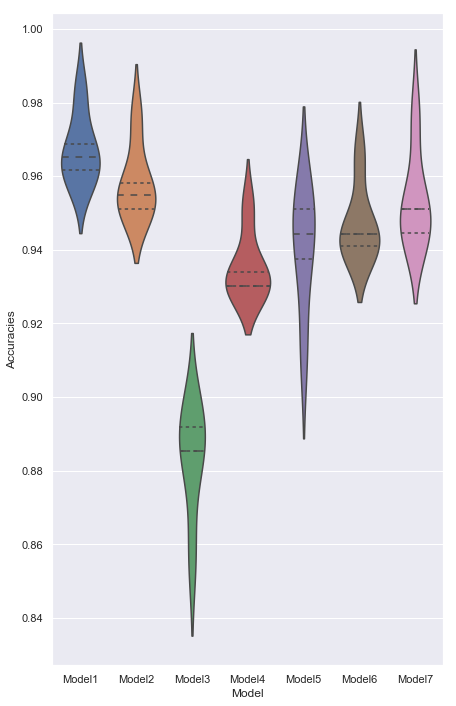

In [170]:
# Results from cross-validation 
sns.violinplot(x= "Model" , y="Accuracies", data = df, inner="quartile" )

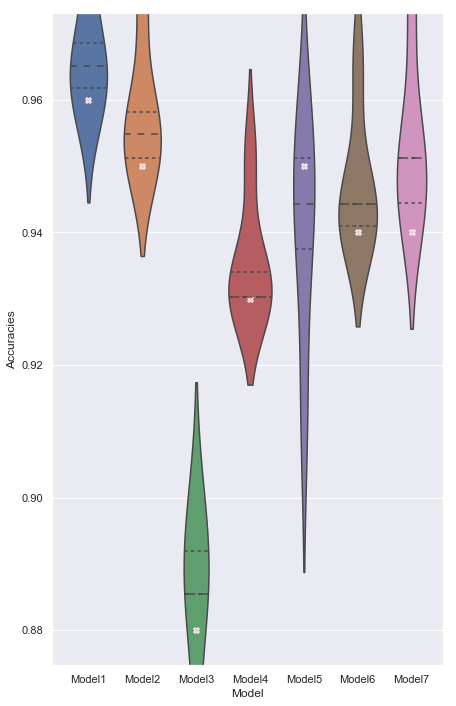

In [182]:
# Results from both cross-validation and the test set
sns.violinplot(x= "Model" , y="Accuracies", data = df, inner="quartile")
sns.scatterplot(data=df1, x="Model", y="Accuracies", marker='X', color='pink')
